# Project Social Media Analytics (Tweets dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dataprep">A. Data Preparation</a></li>
<li><a href="#eda"> B. Exploratory Data Analysis from Dataset</a></li>
<li><a href="#modeling">C. Modeling</a></li>
<li><a href="#modeling+">D. Bonus Part - Modeling+</a></li>
<li><a href="#conclussion">E. Conclussion</a></li>
</ul>

<a id='intro'></a>
## Introduction

>### **Overview**
>To complete my Data Analysis project I am using Tweets dataset. 

>This data set contains information about 1.600.000 tweets. It consist of 2 columns:  text of tweet, and target of sentiment

>#### **Things analysed from this data set**
> 1. Preprocessing Data, with : stopwords removal, frequent words removal, rare words removal, Spelling correction, tokenization, and Lemmatization. 
> 2. Data exploration   
> 3. Visualization using wordcloud for the negative and positive tweets
> 4. Splitting the data into train and test to making some models
> 5. Making confussion matrices and get the accuration from each models

In [10]:
import pandas as pd 
import numpy as np 
import nltk 

#import nltk for natural language toolkit
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords


#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dwilar064174\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id='dataprep'></a>

# A. Data Preparation

### A.1. Load the data

In [60]:
df=pd.read_csv('clean_tweet.csv')
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [6]:
df.dtypes

text      object
target     int64
dtype: object

In [5]:
#dataset shape
df.shape

(1600000, 2)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1600000 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


**Note** :
1. From the results above, we know that there are 1.600.000 tweets in dataset. 
2. It consist of 2 columns, tweets as text and sentiment as target. 
3. Target = 0  means negative sentiment, and target = 1 means positive sentiment
4. There is no missing value from the data
5. Type of text  is object, and type of target is int : 0 and 1. 

### A.2. Preprocessing Data 

#### 1. Stopwords Removal 
> Stop words are generally the most common words in a language

In [61]:
#stopword
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop))
df['text'].head(10)

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
5                                           whole crew
6                                             need hug
7    hey long time see yes rains bit bit lol fine t...
8                                               k nope
9                                            que muera
Name: text, dtype: object

#### 2. Frequent Words Removal
> Remove word frequently appear

In [62]:
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:20]
freq

good      91355
day       89776
get       82176
like      78582
go        74031
today     68226
work      64960
love      64857
going     64633
got       61454
lol       59276
time      57971
back      56977
u         56380
one       54090
know      52065
im        50670
really    50039
see       46382
night     43965
dtype: int64

> Then,I want to remove the following words : get, go, today, work, going, got, back, u, one, know, im, really , see, night

In [63]:
removeword= {'get', 'go', 'today', 'work', 'going', 'got','back', 'u', 'one', 'know', 'im', 'really', 'see', 'night'}

In [64]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in removeword))
df['text'].head()

0             awww bummer shoulda david carr third day
1    upset update facebook texting might cry result...
2       dived many times ball managed save rest bounds
3                     whole body feels itchy like fire
4                                         behaving mad
Name: text, dtype: object

#### 3. Rare Words Removal 
> Remove uncommon word

In [67]:
rare_word = pd.Series(' '.join(df['text']).split()).value_counts()[-30:]
rare_word

piicccturreesss                                 1
clearz                                          1
mindreading                                     1
bachorlette                                     1
potosi                                          1
smackeroos                                      1
caresday                                        1
hahhahahahahahhaaha                             1
maccave                                         1
superxiv                                        1
concievable                                     1
deppresion                                      1
laaaah                                          1
tonyblackburn                                   1
daybreakers                                     1
skiers                                          1
bffr                                            1
kalley                                          1
sooooooooooooooooooooooooooooooooooooooooooo    1
aawwweeee                                       1


In [68]:
rare_word = list(rare_word.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text'].head()

0                 awww bummer shoulda david carr third
1    upset update facebook texting might cry result...
2       dived many times ball managed save rest bounds
3                          whole body feels itchy fire
4                                         behaving mad
Name: text, dtype: object

### 4. Spelling correction

In [69]:
df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                   www summer should david care third
1    upset update facebook testing might cry result...
2       dived many times ball managed save rest bounds
3                          whole body feels itchy fire
4                                         behaving mad
Name: text, dtype: object

### 5. Tokenization

> process of replacing sensitive data with unique identification symbols that retain all the essential information about the data without compromising its security.

In [70]:
nltk.download('punkt')
TextBlob(df['text'][1]).words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dwilar064174\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['upset', 'update', 'facebook', 'texting', 'might', 'cry', 'result', 'school', 'also', 'blah'])

### 6. Stemming/Lemmatization

> Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.

In [71]:
#lematization 
df['text']  = df['text'] .apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))

<a id='eda'></a>
#  B : Exploratory Data Analysis from Dataset

## B.1. Simply EDA

In [14]:
df['target'].value_counts()

1    800000
0    800000
Name: target, dtype: int64

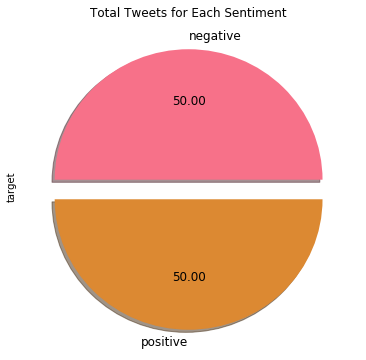

In [183]:
colors=sns.color_palette("husl", 10)
pd.Series(df["target"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "positive"],explode=[0.05,0.1],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

**Note** :
1. 50 % of tweets are positive, and the others are negative sentiment. 
2. The composition of data is actually good for modelling. 

## B.2 WordCloud

In [72]:
# Target :
# 0 : Negative
# 1 : Positive

#define positive and not negative
positive = df.loc[df['target'] == 1]
negative  = df.loc[df['target'] == 0]

In [73]:
#merge all the happy comments into one paragraph
all_text_positive= "".join(positive.text.values)
all_text_negative= "".join(negative.text.values)

In [74]:
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

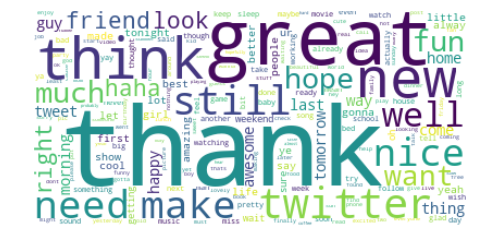

In [76]:
#positive word cloud
plt.figure(figsize=(10,4))
create_word_cloud(all_text_positive)

In [164]:
#function for creat word cloud
from PIL import Image
def create_word_cloud(string):
    mask = np.array(Image.open("Cloud.png"))
    cloud = WordCloud(background_color = "white", mask = mask, contour_width = 2, contour_color = 'steelblue', max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    cloud.to_file("cloud_image.png")
    plt.figure(figsize = (18, 12))
    plt.imshow(cloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

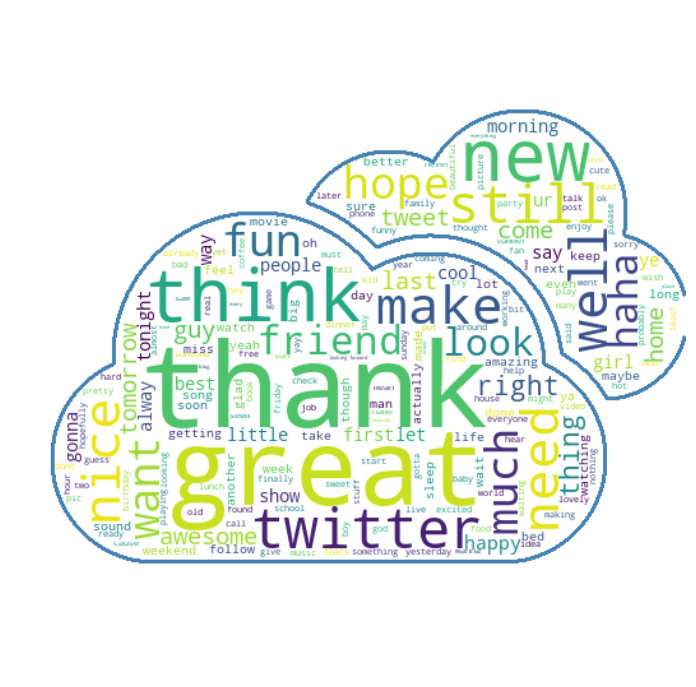

In [165]:
create_word_cloud(all_text_positive)

> **Note** :
> Thank, great, friend, hope, twitter, nice, haha, and fun are wordclouds as  popular visualization of words typically associated with positive sentiment of tweets. 

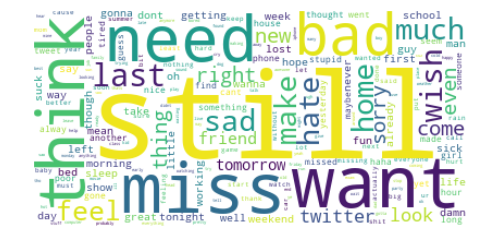

In [78]:
#negative word cloud
plt.figure(figsize=(10,4))
create_word_cloud(all_text_negative)

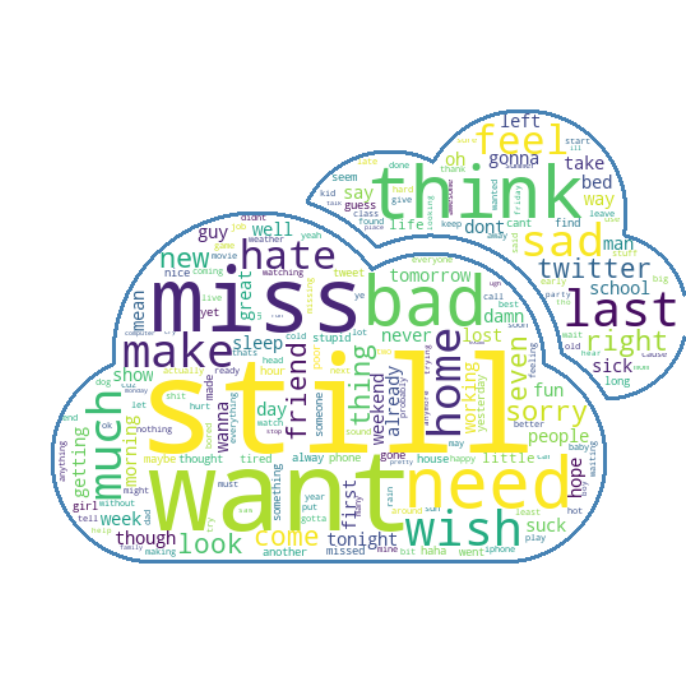

In [166]:
create_word_cloud(all_text_negative)

> **Note** :
> Still, miss, want, need, think, sad, make, hate, home, sorry, wish, feel, and come  are wordclouds as  popular visualization of words typically associated with negative sentiment of tweets. 

<a id='modeling'></a>
# C. Modeling 

## C.1. Train Test Split

In [128]:
X = df['text']
y = df['target']

#countvectorizer
#Convert a collection of text documents to a matrix of token counts
count_vectorizer = CountVectorizer(stop_words='english')
X_vectorizer = count_vectorizer.fit_transform(X)

#tfidf vectorizer
#Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf = TfidfVectorizer(stop_words='english' )
X_tfidf = tfidf.fit_transform(X)

#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.2, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

## C.2. Modeling

> Modeling with the following regression: 
1. Logistic Regression
2. Naive Bayes

> Model Evaluation
1. Precision = precision_score()
2. Recall = recall_score() 
3. F_measure = f1_score()

### C.2.1 Modeling with Logistic Regression 

In [129]:
# Countvectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)

# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

### C.2.2 Logistic Regression Evaluation

In [137]:
# using count vectorizer
print("______________ Countvectorizer ______________")

Lr_clf_vec_report_train = classification_report(train_y, Lr_pred_vect_train)
Lr_clf_vec_report_test = classification_report(test_y, Lr_pred_vect_test)
Lr_confmatrix_vect_train = confusion_matrix(train_y, Lr_pred_vect_train) 
Lr_confmatrix_vect_test = confusion_matrix(test_y, Lr_pred_vect_test)

Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test,average="micro") 
Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test,average="micro")
Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test,average="micro")

print('Information :')
print('Confusion matrix for Train :')
print(Lr_confmatrix_vect_train,'\n')
print('Confusion matrix for Test :')
print(Lr_confmatrix_vect_test,'\n')
print('Classification Refort for Train :')
print(Lr_clf_vec_report_train,'\n')
print('Classification Refort for Test :')
print(Lr_clf_vec_report_test,'\n')

print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Confusion matrix for Train :
[[491370 148815]
 [111141 528674]] 

Confusion matrix for Test :
[[116942  42873]
 [ 32353 127832]] 

Classification Refort for Train :
             precision    recall  f1-score   support

          0       0.82      0.77      0.79    640185
          1       0.78      0.83      0.80    639815

avg / total       0.80      0.80      0.80   1280000
 

Classification Refort for Test :
             precision    recall  f1-score   support

          0       0.78      0.73      0.76    159815
          1       0.75      0.80      0.77    160185

avg / total       0.77      0.76      0.76    320000
 

Recall train & test     : 79.69% & 76.49%
Precision train & test  : 79.69% & 76.49%
F1 Score train & test   : 79.69% & 76.49%


In [138]:
# using TF-IDF
print("______________ TF-IDF ______________")

Lr_clf_tfidf_report_train = classification_report(train_y, Lr_pred_tfidf_train)
Lr_clf_tfidf_report_test = classification_report(test_y, Lr_pred_tfidf_test)
Lr_confmatrix_tfidf_train = confusion_matrix(train_y, Lr_pred_tfidf_train) 
Lr_confmatrix_tfidf_test = confusion_matrix(test_y, Lr_pred_tfidf_test)

Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 
Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")
Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Confusion matrix for Train :')
print(Lr_confmatrix_tfidf_train,'\n')
print('Confusion matrix for Test :')
print(Lr_confmatrix_tfidf_test,'\n')
print('Classification Refort for Train :')
print(Lr_clf_tfidf_report_train,'\n')
print('Classification Refort for Test :')
print(Lr_clf_tfidf_report_test,'\n')

print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Confusion matrix for Train :
[[487566 152619]
 [117667 522148]] 

Confusion matrix for Test :
[[117531  42284]
 [ 32196 127989]] 

Classification Refort for Train :
             precision    recall  f1-score   support

          0       0.81      0.76      0.78    640185
          1       0.77      0.82      0.79    639815

avg / total       0.79      0.79      0.79   1280000
 

Classification Refort for Test :
             precision    recall  f1-score   support

          0       0.78      0.74      0.76    159815
          1       0.75      0.80      0.77    160185

avg / total       0.77      0.77      0.77    320000
 

Recall train & test     : 78.88% & 76.72%
Precision train & test  : 78.88% & 76.72%
F1 Score train & test   : 78.88% & 76.49%


### C.2.1 Modeling with Naive Bayes

In [132]:
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)

# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

### C.2.2 Naive Bayes Evaluation

In [139]:
# find model evaluation for naive bayes
# using count vectorizer
print("______________ Countvectorizer ______________")

NB_clf_vec_report_train = classification_report(train_y, NB_pred_vect_train)
NB_clf_vec_report_test = classification_report(test_y, NB_pred_vect_test)
NB_confmatrix_vect_train = confusion_matrix(train_y, NB_pred_vect_train) 
NB_confmatrix_vect_test = confusion_matrix(test_y, NB_pred_vect_test)

NB_recall_vec_train = recall_score(train_y, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(test_y, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(train_y, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(test_y, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(train_y, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(test_y,NB_pred_vect_test,average="micro")

print('Information :')

print('Confusion matrix for Train :')
print(NB_confmatrix_vect_train,'\n')
print('Confusion matrix for Test :')
print(NB_confmatrix_vect_test,'\n')
print('Classification Refort for Train :')
print(NB_clf_vec_report_train,'\n')
print('Classification Refort for Test :')
print(NB_clf_vec_report_test,'\n')

print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Confusion matrix for Train :
[[509050 131135]
 [143703 496112]] 

Confusion matrix for Test :
[[122345  37470]
 [ 40087 120098]] 

Classification Refort for Train :
             precision    recall  f1-score   support

          0       0.78      0.80      0.79    640185
          1       0.79      0.78      0.78    639815

avg / total       0.79      0.79      0.79   1280000
 

Classification Refort for Test :
             precision    recall  f1-score   support

          0       0.75      0.77      0.76    159815
          1       0.76      0.75      0.76    160185

avg / total       0.76      0.76      0.76    320000
 

Recall train & test     : 78.53% & 75.76%
Precision train & test  : 78.53% & 75.76%
F1 Score train & test   : 78.53% & 75.76%


In [140]:
# using TF-IDF
print("______________ TF-IDF ______________")

NB_clf_tfidf_report_train = classification_report(train_y, NB_pred_tfidf_train)
NB_clf_tfidf_report_test = classification_report(test_y, NB_pred_tfidf_test)
NB_confmatrix_tfidf_train = confusion_matrix(train_y, NB_pred_tfidf_train) 
NB_confmatrix_tfidf_test = confusion_matrix(test_y, NB_pred_tfidf_test)

NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

print('Information :')

print('Confusion matrix for Train :')
print(NB_confmatrix_tfidf_train,'\n')
print('Confusion matrix for Test :')
print(NB_confmatrix_tfidf_test,'\n')
print('Classification Refort for Train :')
print(NB_clf_tfidf_report_train,'\n')
print('Classification Refort for Test :')
print(NB_clf_tfidf_report_test,'\n')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Confusion matrix for Train :
[[508262 131923]
 [142233 497582]] 

Confusion matrix for Test :
[[121043  38772]
 [ 40623 119562]] 

Classification Refort for Train :
             precision    recall  f1-score   support

          0       0.78      0.79      0.79    640185
          1       0.79      0.78      0.78    639815

avg / total       0.79      0.79      0.79   1280000
 

Classification Refort for Test :
             precision    recall  f1-score   support

          0       0.75      0.76      0.75    159815
          1       0.76      0.75      0.75    160185

avg / total       0.75      0.75      0.75    320000
 

Recall train & test     : 78.58% & 75.19%
Precision train & test  : 78.58% & 75.19%
F1 Score train & test   : 78.58% & 75.76%


> **Note** 
1. I made models from Logistic Regression and Naive Bayes. 
2. From the models, I got similar accuration whether from Count Vectorizer or Naive Bayes
3. The precision and recall are around 75% - 79%.

<a id='modeling+'></a>

# D. Bonus Part - Modeling+
> Seems like our data is too large. Now I try to another model with sample data. Sample data is founded from random sample from dataset. I only used 16.000 data from dataset to be sample data (ds).

### D.1. Random Sampling the Data 

In [167]:
# import random  
from random import sample
# applying random sample
ds=df.sample(n=16000)

In [168]:
ds.head()

,text,target
969702,still wolframalpha promising useful alternativ...,1
1409952,glad brubeck reopened new improved job guy,1
142173,hm flg gd bt bk borrowed bt finding put kg damn,0
1316841,,1
1535692,vizioncore spread fud esxi end needed kind exp...,1


In [169]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 969702 to 1567998
Data columns (total 2 columns):
text      16000 non-null object
target    16000 non-null int64
dtypes: int64(1), object(1)
memory usage: 375.0+ KB


In [173]:
ds.target.value_counts()

1    8074
0    7926
Name: target, dtype: int64

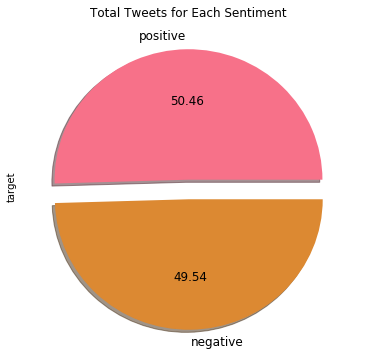

In [186]:
colors=sns.color_palette("husl", 10)
pd.Series(ds["target"]).value_counts().plot(kind="pie",colors=colors,
    labels=["positive","negative"],explode=[0.05,0.1],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

**Note** :
1. 50.46 % of tweets are positive, and the others are negative sentiment. 
2. The composition of data is actually good for modelling. 

In [171]:
ds['sentiment']=ds['target'].apply(lambda x: 'negative' if x==0 else 'positive')
ds.head()

,text,target,sentiment
969702,still wolframalpha promising useful alternativ...,1,positive
1409952,glad brubeck reopened new improved job guy,1,positive
142173,hm flg gd bt bk borrowed bt finding put kg damn,0,negative
1316841,,1,positive
1535692,vizioncore spread fud esxi end needed kind exp...,1,positive


### D.2. Train Test Split

In [172]:
### Splitting the data into train and test
ds['clean_tweet']=ds['text'].apply(lambda x: tweet_to_words(x))
ds['Tweet_length']=ds['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(ds,test_size=0.2,random_state=42)

In [174]:
train_clean_tweet=[]
for tweets in train['clean_tweet']:
    train_clean_tweet.append(tweets)
test_clean_tweet=[]
for tweets in test['clean_tweet']:
    test_clean_tweet.append(tweets)

### D.3. Count Vectorizer 

In [175]:
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

### D.4. Classifiers

In [179]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    AdaBoostClassifier()]

### D.5. Confussion matrix

In [182]:
dense_features=train_features
dense_test= test_features
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print(classification_report(pred,test['sentiment']))

Accuracy of LogisticRegressionis 0.580625
             precision    recall  f1-score   support

   negative       0.20      0.83      0.32       386
   positive       0.96      0.55      0.70      2814

avg / total       0.87      0.58      0.65      3200

Accuracy of SVCis 0.5


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

   negative       0.00      0.00      0.00         0
   positive       1.00      0.50      0.67      3200

avg / total       1.00      0.50      0.67      3200

Accuracy of DecisionTreeClassifieris 0.69
             precision    recall  f1-score   support

   negative       0.71      0.68      0.70      1654
   positive       0.67      0.70      0.68      1546

avg / total       0.69      0.69      0.69      3200

Accuracy of AdaBoostClassifieris 0.6390625
             precision    recall  f1-score   support

   negative       0.38      0.79      0.51       761
   positive       0.90      0.59      0.71      2439

avg / total       0.78      0.64      0.67      3200



Text(0.5,1,'Accuracies of Models')

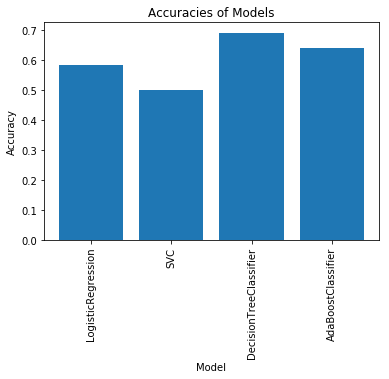

In [184]:
Index = [1,2,3,4]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

> **Note** :
Another model from from 16.000 tweets is not greater than 1.600.000 tweets. Accuracy from the models as you can see below :
1. Accuracy of LogisticRegressionis 0.580625
2. Accuracy of SVCis 0.5
3. Accuracy of DecisionTreeClassifieris 0.69
4. Accuracy of AdaBoostClassifieris 0.6390625

<a id='conclussion'></a>

# E. Conclussion

- Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. However, analysis of social media streams is usually restricted to just basic sentiment analysis and count based metrics.

- From the analitics above, I made preprocessing Data, with : stopwords removal, frequent words removal, rare words removal, Spelling correction, tokenization, and Lemmatization. Data exploration to looking for number of tweets each sentiment. I made visualization using wordcloud for the negative and positive tweets. Then, to making some models, I splited the data into train and test, and made confussion matrices and get the accuration from each models. 

- From Logistic Regression and Naive Bayes I got similar accuration whether from Count Vectorizer or Naive Bayes. The precision and recall are around 75% - 79%. Then I made another models from sample data. LogisticRegression, SVC,  Decision Tree Classifier, and AdaBoostClassifier. The accuracies are not greater than previous models, only 50% - 69%. 